In [110]:
import pandas as pd
import matplotlib.pyplot as plt





import warnings
warnings.simplefilter(action='ignore', category=Warning)


In [50]:
data = pd.read_csv("C:\\Users\\Lap Tech\\Downloads\\taxi_trip_pricing.csv")

In [52]:
print(data.head())

   Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
0             19.35     Morning     Weekday              3.0   
1             47.59   Afternoon     Weekday              1.0   
2             36.87     Evening     Weekend              1.0   
3             30.33     Evening     Weekday              4.0   
4               NaN     Evening     Weekday              3.0   

  Traffic_Conditions Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0                Low   Clear       3.56         0.80             0.32   
1               High   Clear        NaN         0.62             0.43   
2               High   Clear       2.70         1.21             0.15   
3                Low     NaN       3.48         0.51             0.15   
4               High   Clear       2.93         0.63             0.32   

   Trip_Duration_Minutes  Trip_Price  
0                  53.82     36.2624  
1                  40.57         NaN  
2                  37.27     52.9032  
3                 11

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [68]:
data.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [ ]:
MISSING VALUES


In [72]:
(data.isnull().sum())

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [76]:
import seaborn as sns

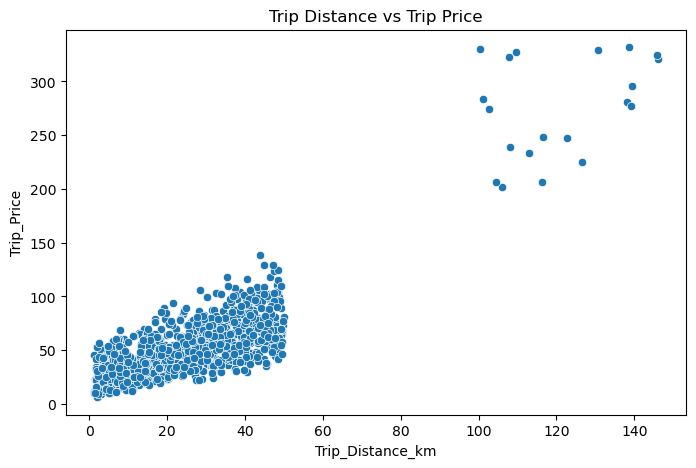

In [80]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Trip_Distance_km'], y=data['Trip_Price'])
plt.title('Trip Distance vs Trip Price')
plt.show()

In [ ]:
FINDING CO-RELATION


In [84]:
correlation = data['Trip_Distance_km'].corr(data['Trip_Price'])
print("\nCorrelation Matrix is given as:\n", correlation)


Correlation Matrix is given as:
 0.8491226112062743


In [ ]:
DEALING WITH OUTLIERS

In [102]:
Q1 = data[['Trip_Distance_km', 'Trip_Price']].quantile(0.25)
Q3 = data[['Trip_Distance_km', 'Trip_Price']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = data[~((data[['Trip_Distance_km', 'Trip_Price']] < lower_bound) | (data[['Trip_Distance_km', 'Trip_Price']] > upper_bound)).any(axis=1)]

In [112]:
data['Trip_Price'].fillna(data['Trip_Price'].median(), inplace=True)
data['Trip_Distance_km'].fillna(data['Trip_Distance_km'].median(), inplace=True)
data.isnull().sum()

Trip_Distance_km          0
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price                0
dtype: int64

In [120]:
from sklearn.preprocessing import StandardScaler


In [122]:
scaler = StandardScaler()
df_no_outliers['Trip_Distance_km'] = scaler.fit_transform(df_no_outliers[['Trip_Distance_km']])
df_no_outliers['Trip_Price'] = scaler.fit_transform(df_no_outliers[['Trip_Price']])

In [124]:
X = df_no_outliers[['Trip_Distance_km']] 
y = df_no_outliers['Trip_Price']

In [126]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
from sklearn.linear_model import LinearRegression

In [132]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [134]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
import numpy as np
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 0.56
Root Mean Squared Error (RMSE): 0.75


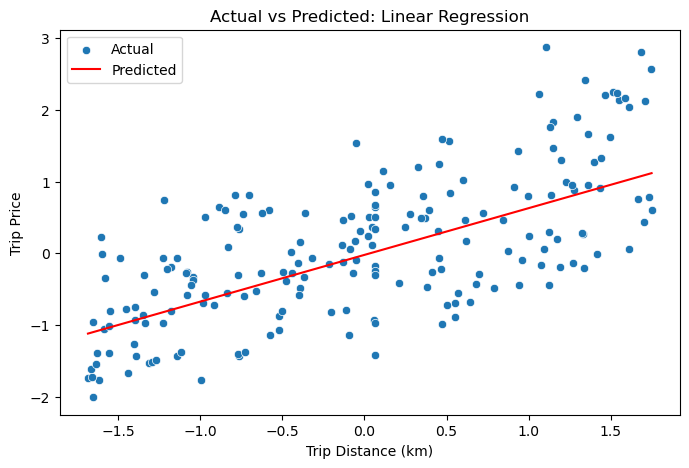

In [136]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['Trip_Distance_km'], y=y_test, label="Actual")
sns.lineplot(x=X_test['Trip_Distance_km'], y=y_pred, color="red", label="Predicted")
plt.xlabel("Trip Distance (km)")
plt.ylabel("Trip Price")
plt.title("Actual vs Predicted: Linear Regression")
plt.legend()
plt.show()